In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       184
           1       0.87      0.76      0.81       116

    accuracy                           0.86       300
   macro avg       0.87      0.84      0.85       300
weighted avg       0.86      0.86      0.86       300

Confusion Matrix:
 [[171  13]
 [ 28  88]]


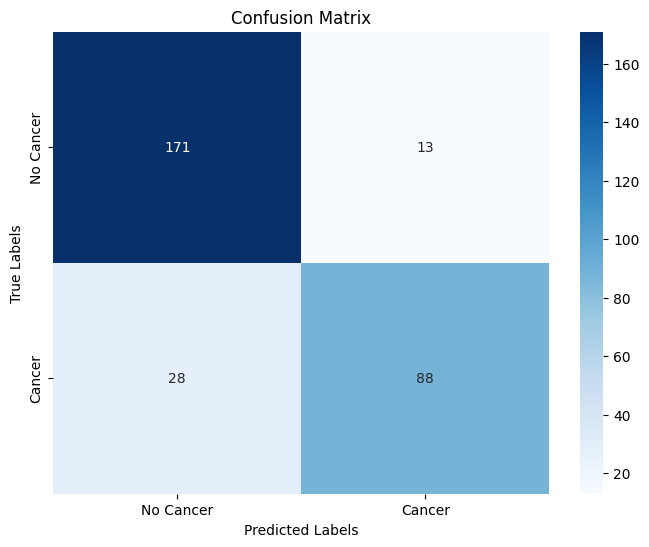

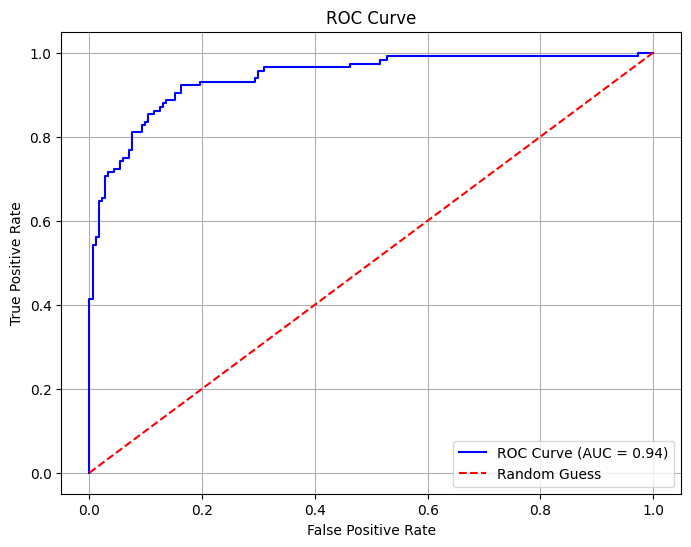

In [14]:
# Load the processed dataset
df = pd.read_csv("../Data/The_Cancer_data_1500_V3_Processed.csv")  # Use the correct file path


# Split data into features (X) and target (y)
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']                 # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


# Confusion Matrix - Improved Visualization and Save
def plot_and_save_confusion_matrix(y_test, y_pred, filename):
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig(filename)
    plt.show()

# ROC Curve - Improved Visualization and Save
def plot_and_save_roc_curve(fpr, tpr, roc_auc, filename):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.show()

# Plot and Save Confusion Matrix
plot_and_save_confusion_matrix(y_test, y_pred, "../Data/confusion_matrix.png")

# Plot and Save ROC Curve
plot_and_save_roc_curve(fpr, tpr, roc_auc, "../Data/roc_curve.png")